Name: Nkosinathi Ntuli  
Student Number: NTLNKO007  
Course: EEE3092F  

#### Declaration  
I know that plagiarism is wrong. Plagiarism is to use another’s work and pretend that it is one’s own.  
I have not allowed, and will not allow, anyone, to copy my work with the intention of passing it off as his or her own work.  

Signature: Nkosinathi Ntuli   
Date: 18 June 2021

# Julia Exercise 6.1 – DSB-SC AM (modulation & demodulation)

## Julia Exercise 6.1a – DSB-SC AM (modulation)

In [2]:
using Pkg
using PyPlot
#using Plots
#pyplot()
#plotly()
using FFTW

(i) Simulate double sideband suppressed carrier amplitude modulation (DSB-SC AM) with the following
parameters:

Modulating waveform is an audio signal: f(t) = cos(2πfmt) where fm=1 kHz.
Carrier wave oscillator: cos(2πfct) where fc=20 kHz.
Modulated carrier wave signal: ϕ(t) = f(t) cos(2πfct)


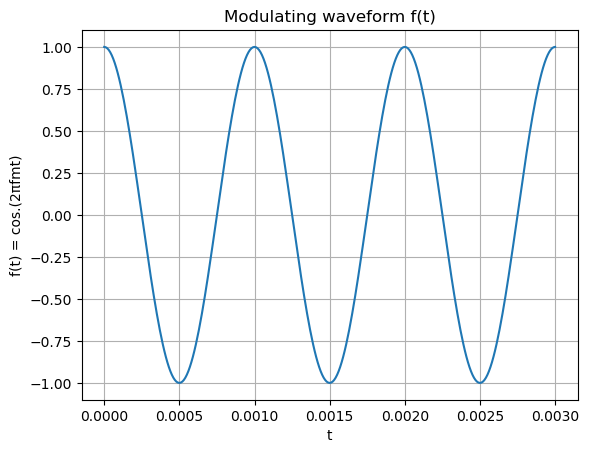

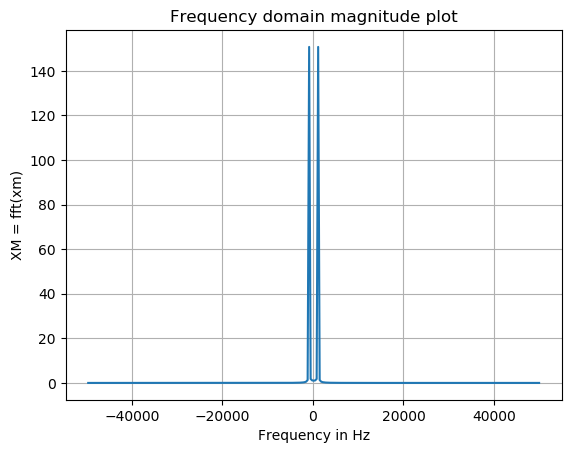

In [58]:
fs = 100e3
fm=1e3
fc=20e3

Δt = 1/fs
tmax = 3/fm
t = 0:Δt:tmax

f(t) = cos.(2π*fm.*t)

xm = f.(t)

figure()
plot(t, xm)

grid("on")
title("Modulating waveform f(t)")
ylabel("f(t) = cos.(2πfmt)")
xlabel("t");


# in the freq domain
FM = fft(xm)

N = length(t)
Δf = fs/N
fx = (-fs/2+Δf):Δf:(fs/2)

figure()
plot(fx, fftshift(abs.(FM)));

grid("on")
title("Frequency domain magnitude plot")
ylabel("XM = fft(xm)")
xlabel("Frequency in Hz");

(ii) Plot the carrier sinusoid cos(2πfct) over the same time duration.
 Plot the frequency domain magnitude.

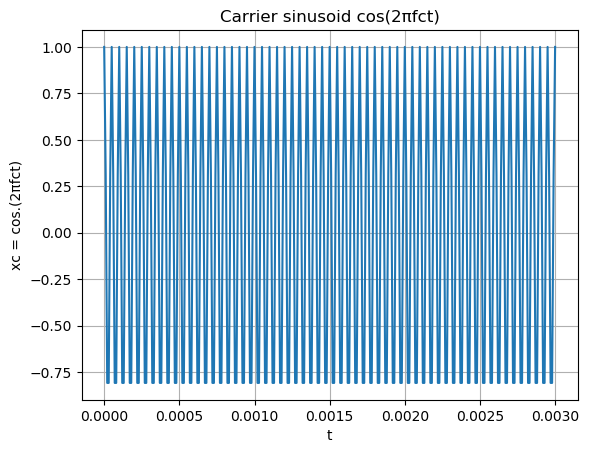

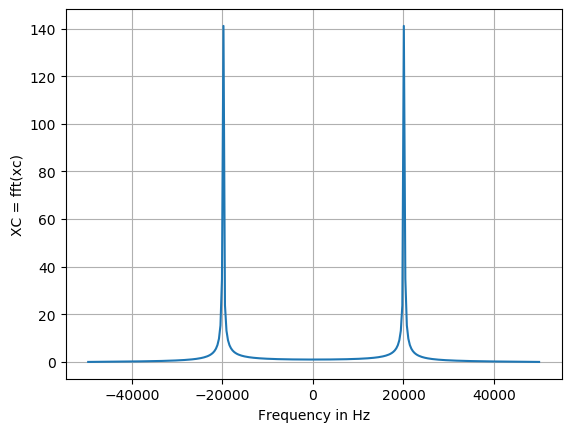

In [59]:
xc = cos.(2π*fc.*t)

figure()
plot(t, xc);

grid("on")
title("Carrier sinusoid cos(2πfct)");
ylabel("xc = cos.(2πfct)")
xlabel("t");

XC = fft(xc);

figure()
plot(fx,fftshift(abs.(XC)));

grid("on")
ylabel("XC = fft(xc)")
xlabel("Frequency in Hz");

(iii) Plot the amplitude modulated carrier wave ϕ(t) = f(t) cos(2πfct)
 Plot the frequency domain.
 You should see two sidebands on either side of the carrier fc. 
What frequencies are they?
 You may have to increase the time duration of the simulation to clearly resolve the two sidebands. 
 
Questions: 

What happens to the sidebands if the modulating frequency is changed from 1kHz to2kHz?

- they become wider or their width increases 

What happens to the sidebands if the modulating amplitude is doubled?
Try f(t) = 2cos(2πfmt)

- no sifnificant change was observed

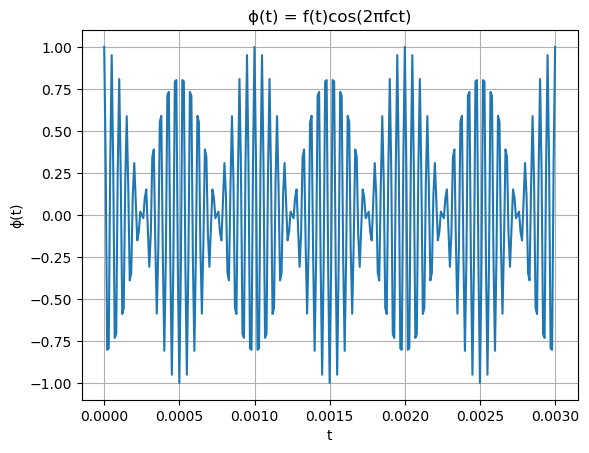

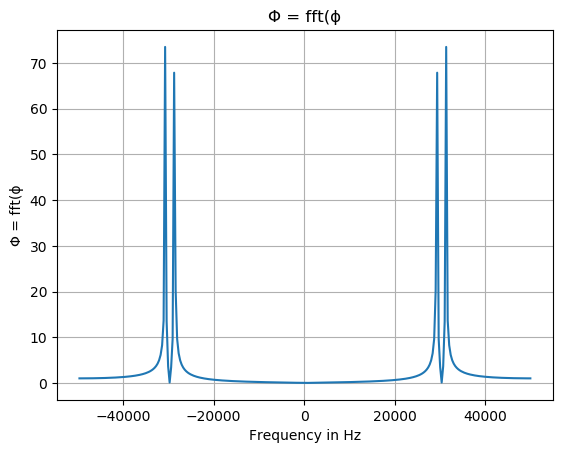

In [60]:
#ϕ(t) = f.(t) .* cos(2π*fc*t)

ϕ = xm .* xc 

figure()
plot(t, ϕ);

grid("on")
title("ϕ(t) = f(t)cos(2πfct)")
ylabel("ϕ(t)")
xlabel("t");

#in the frequency domain
Φ = fft(ϕ)

figure()
plot(fx, abs.(Φ));

grid("on")
title("Φ = fft(ϕ")
ylabel("Φ = fft(ϕ")
xlabel("Frequency in Hz");

(iv) Try changing the modulating waveform to a 1kHz square wave. An easy way to create a square wave in Julia is by comparison with a threshold of 0, square_wave(t) = ( (sin.(2*pi*fm*t) .> 0) .- 0.5 )*2
#square wave -1,+1  
Plot the modulating waveform f(t) showing three or more cycles.  
Plot the frequency domain magnitude, with the axis nicely labelled in kHz.  
Plot the amplitude modulated carrier wave ϕ(t) = f(t) cos(2πfct)  
Plot the frequency domain.  
Questions: What frequencies are present in the spectrum of ϕ(t)?
- 

In [37]:
square_wave(t) = ( (sin.(2*pi*fm*t) .> 0) .- 0.5 )*2;

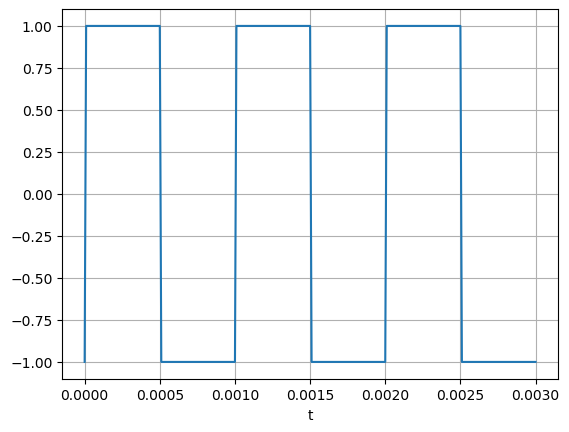

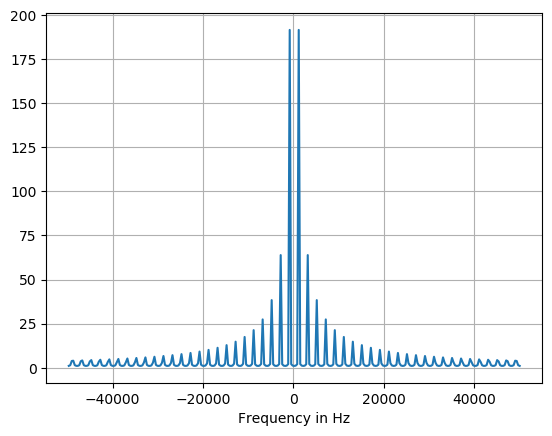

In [77]:
f_square = square_wave(t)

figure()
plot(t, f_square);
xlabel("t")
grid("on");

F_Square = fft(f_square)

figure()
plot(fx, fftshift(abs.(F_Square)));
xlabel("Frequency in Hz")
grid("on");

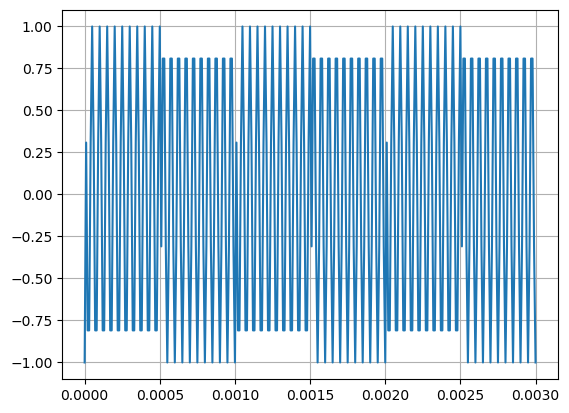

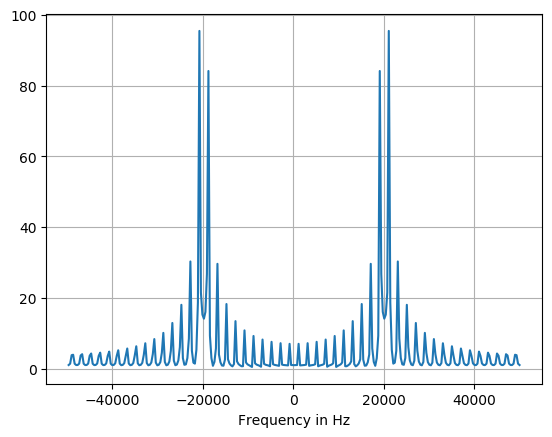

In [78]:
ϕ_square = f_square .* xc

figure()
plot(t, ϕ_square)
grid("on");


# in the freq daomain
Φ_Square = fft(ϕ_square)

figure()
plot(fx, fftshift(abs.(Φ_Square)));
xlabel("Frequency in Hz")
grid("on");

## Julia Exercise 6.1b – DSB-SC Demodulation

The goal is to demodulate the DSB-SC waveform created in JE6.1a, for the case of f(t) = cos(2πfmt) where fm=1kHz. Demodulate by multiplying ϕ(t) by cos(2πfct), and passing the product through a LPF.
Before running the simulation, consider: what is the highest frequency component in the signal to be simulated?
Do convolution on previous slide. Ensure that your sampling rate still satisfies the Nyquist criterion.

(i) Plot the product: y(t) = ϕ(t)cos(2πfct) over several cycles of the modulating waveform f(t).
Plot the frequency domain magnitude (use the abs.() function), with the axis nicely labelled in Hz (or kHz). Thefftshift() function should be used so that 0Hz is in the middle and the resulting spectrum looks like a typical
Fourier Transform. There is useful code for this purpose in the Jupyter notebook:
julia_signal_processing_demo_ajw.ipynb
Questions: What frequencies are visible in the spectrum?
 What is the Nyquist rate for this product waveform? Is your sample rate high enough?

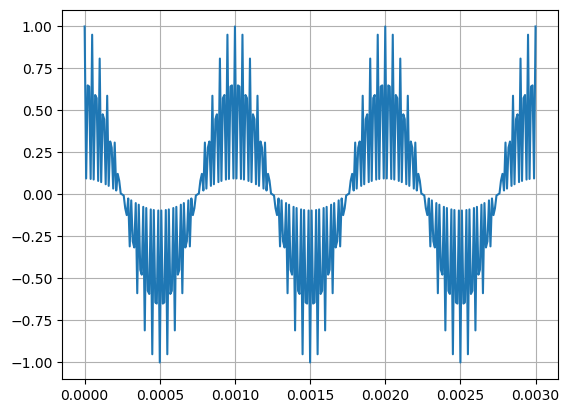

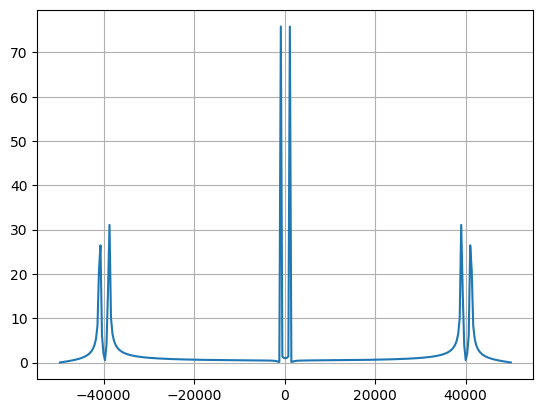

In [9]:
y = ϕ .* xc;

figure()
plot(t, y);
grid("on");

Y = fft(y)

figure()
plot(fx, fftshift(abs.(Y)));
grid("on");

(ii) Implement an ideal LPF (H) in the frequency domain. There is useful code for this purpose in the Jupyternotebook: julia_signal_processing_demo_ajw.ipynb
Choose a LPF cut-off at 5kHz. (A cut of of 5kHz is fine for human speech)
(https://www.dpamicrophones.com/mic-university/facts-about-speech-intelligibility)
Apply the LPF in the frequency domain i.e. V = H.*Y where Y=fft(y).
Inspect the result in the frequency domain i.e display abs.(H.*Y) to check that the high frequency mixing
products have been removed.

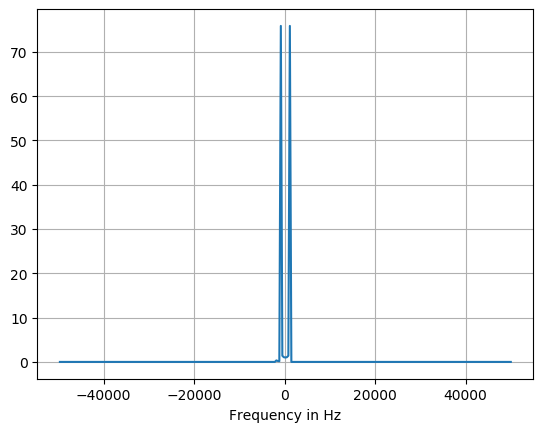

In [10]:
rect(t) = (abs.(t).<=0.5)*1.0

#Δω = 2*pi/(N*Δt)   # Sample spacing in freq domain in rad/s
#ω = 0:Δω:(N-1)*Δω
#fw = ω/(2*π)
#B = 100 # filter bandwidth in Hz
#H = rect(ω/(4*π*B)) + rect( (ω .- 2*π/Δt)/(4*π*B) )

H = rect(fx ./3e3)

V = fftshift(H) .* Y

figure() 
plot(fx,fftshift(abs.(V)))    # Note, H in this case is purely real.
grid("on")
#title("Ideal LPF")
xlabel("Frequency in Hz");

(iii) Take the inverse transform of Y to get back to the time domain. There may be a small imaginary part (due
to numerical error), so take the real part: v = real(ifft(V))
Plot the time domain output and compare it to the 1kHz modulating waveform.
Question: Does the final output agree with the theory? Do you get out ½f(t)?  Yes

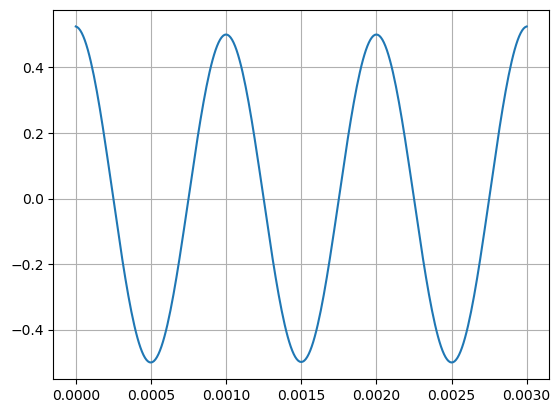

In [11]:
v = real.(ifft(V))

plot(t, v)
#plot(fx, xm)
grid("on");

## Julia Exercise 6.1c – Effect of phase error in demodulation of DSC-SC

Using the same parameters as in parts (a) and (b), simulate the output
of the demodulator for the cases of
(i) Phase error θ of 30 degrees
(ii) Phase error of 60 degrees
(iii) Phase error of 85 degrees
(iv) Phase error of 90 degrees


(i) Phase error θ of 30 degrees 

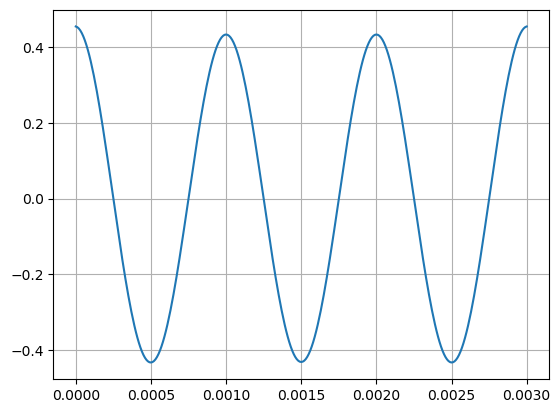

In [12]:
y_30 = ϕ .* cos.(2π*fc.*t .+ π/6)

Y_30 = fft(y_30)
V_30 = fftshift(H) .* Y_30
v_30 = real.(ifft(V_30))
plot(t ,v_30)
grid("on");

(ii) Phase error of 60 degrees

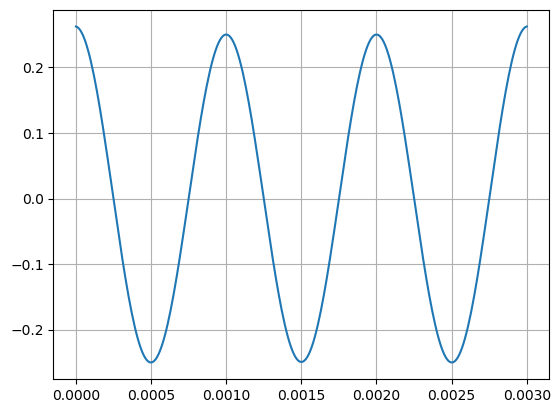

In [13]:
y_60 = ϕ .* cos.(2π*fc.*t .+ π/3)

Y_60 = fft(y_60)
V_60 = fftshift(H) .* Y_60
v_60 = real.(ifft(V_60))
plot(t ,v_60)
grid("on");

(iii) Phase error of 85 degrees

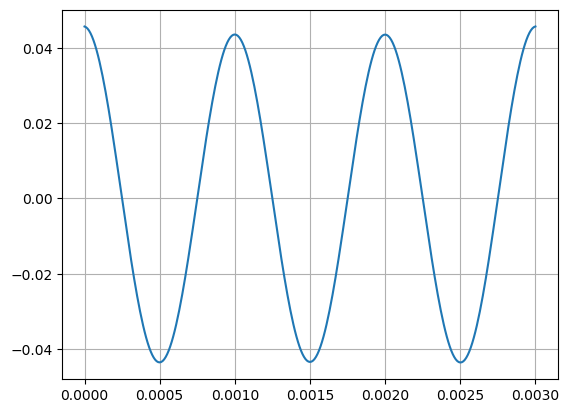

In [14]:
y_85 = ϕ .* cos.(2π*fc.*t .+ 17π/36)

Y_85 = fft(y_85)
V_85 = fftshift(H) .* Y_85
v_85 = real.(ifft(V_85))
plot(t ,v_85)
grid("on");

(iv) Phase error of 90 degrees

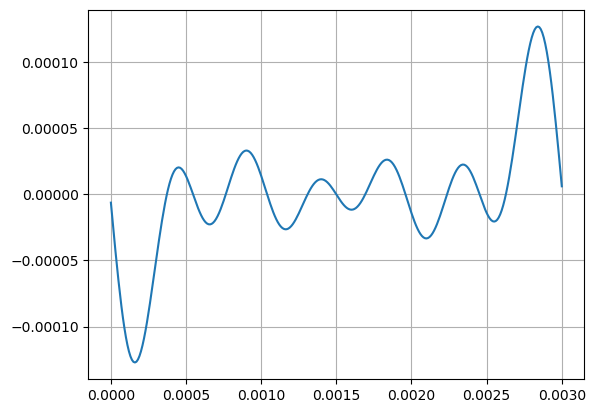

In [15]:
y_90 = ϕ .* cos.(2π*fc.*t .+ π/2)

Y_90 = fft(y_90)
V_90 = fftshift(H) .* Y_90
v_90 = real.(ifft(V_90))
plot(t ,v_90)
grid("on");

## Julia Exercise 6.1d – DSB-SC AM with noise

Extend your simulation to include the addition Gaussian noise to the signal going into the
demodulator.

Plot a histogram of the array.
Display the fft of the noise. It should be wide bandwidth white noise.
Display the noisy AM signal and below it, the output of the demodulator.
Questions: (1) What effect does a phase shift error have on the output SNR? Try 85 deg.
Note: In practice, there will usually be some bandlimiting of the noise before it reaches the
demodulator.
(If the noise is bandlimited to the bandwidth of the modulating waveform, then SNRo = 2xSNRi
as discussed in the lecture notes on SNR in AM.)
(2) How would you calculate the SNR at the output of the demodulator? Describe how you would
you do it in Julia? (You are not required to actually do it – just outline how.)


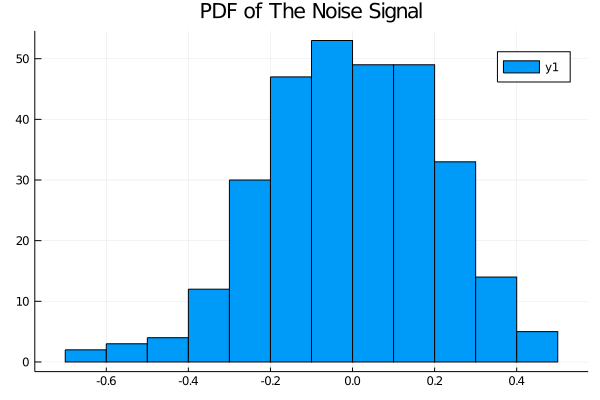

In [66]:
using Plots
σ = 0.2
N = length(t)
noise = σ * randn(N); 

figure1 = histogram(noise, bins = 10, title = "PDF of The Noise Signal" );
display(figure1);

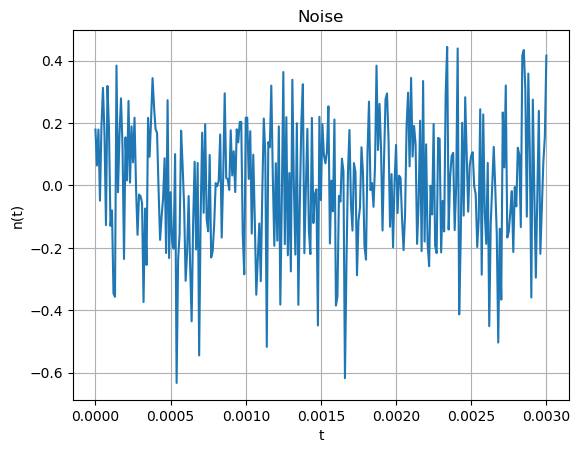

In [70]:
plot(t, noise);
title("Noise")
ylabel("n(t)")
xlabel("t")
grid("on");

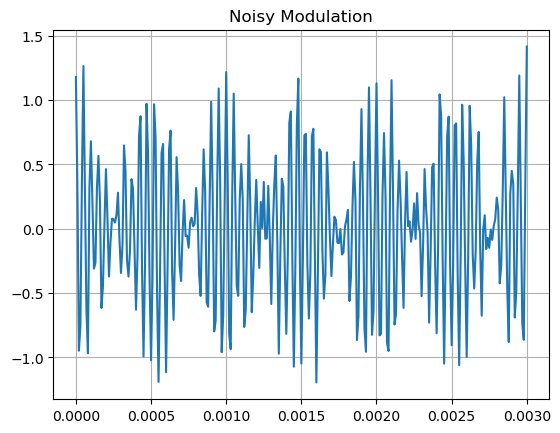

In [71]:
f_tn = xm .+ noise;
ϕ_n = f_tn .* xc;
plot(t, ϕ_n);
title("Noisy Modulation")
grid("on");

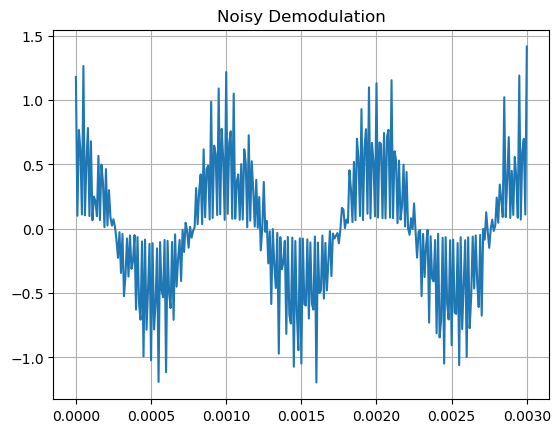

In [73]:
y_n = ϕ_n .* xc;
plot(t, y_n);
title("Noisy Demodulation")
grid("on");

## Julia Exercise 6.2 – DSB-LC AM

Simulate DSB-LC with the following parameters:
Modulating waveform: f(t) = k cos(2πfmt) where fm=1 kHz and k is a constant (k<A).
Carrier wave oscillator: cos(2πfc
t) where fc=20 kHz.
Modulated carrier wave signal: ϕ(t) = Acos(2πfc
t) + f(t) cos(2πfc
t) where A is a constant.
Let A=1 for these simulations. Initially, let k=0.5

(i) Plot the modulating waveform f(t) showing three or more cycles.
Plot the frequency domain magnitude, with the axis nicely labelled in kHz. 

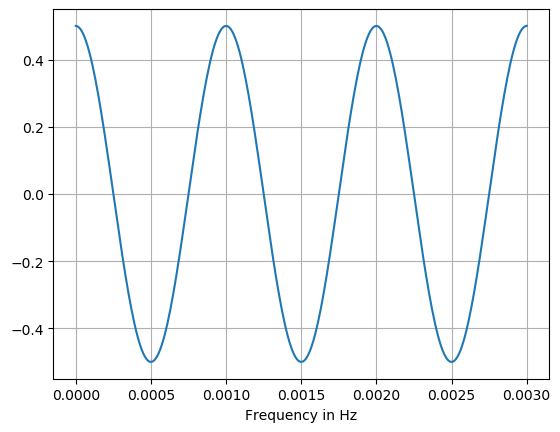

In [20]:
k =0.5
A = 1
xm_lc = k .* xm 

plot(t, xm_lc);
grid("on")
xlabel("Frequency in Hz");

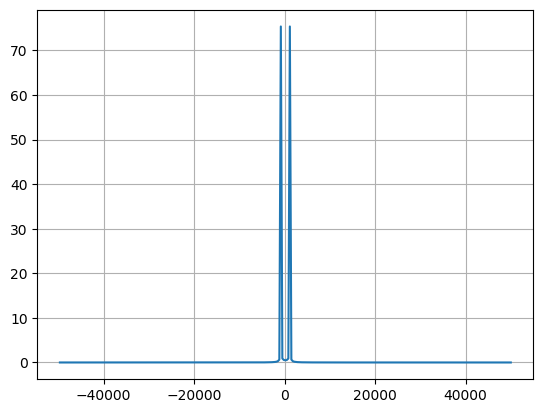

In [68]:
XM_lc = fft(xm_lc)

plot(fx, fftshift(abs.(XM_lc)));
grid("on")

(ii) Plot the carrier sinusoid cos(2πfc
t) over the same time duration.
 Plot the frequency domain magnitude.

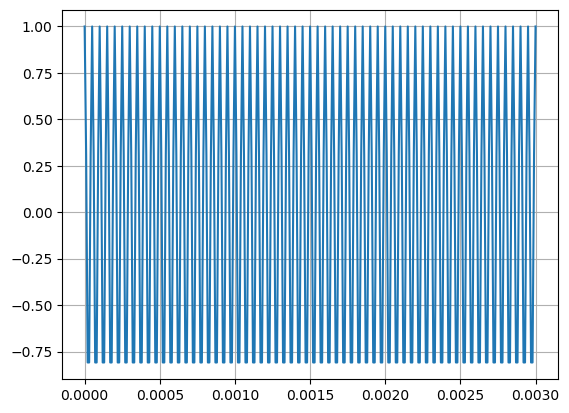

In [69]:
plot(t, xc)
grid("on");

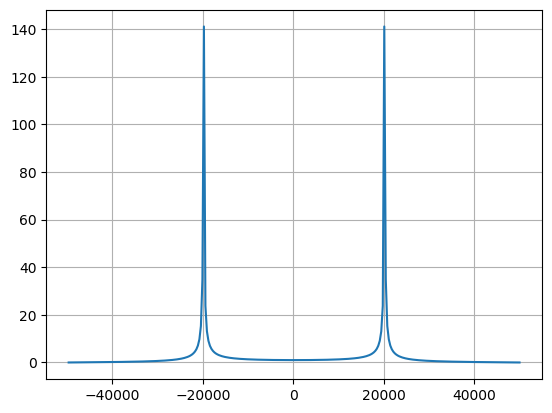

In [23]:
plot(fx, fftshift(abs.(XC)))
grid("on");

(iii) Plot the amplitude modulated carrier wave ϕ(t)
 Plot the frequency domain.
 You should see two sidebands on either side of the carrier fc
. What frequencies are they? 20kHz
 You may have to increase the time duration of the simulation to clearly resolve the two
sidebands.
Questions: What is the modulation index for this case? 1/2

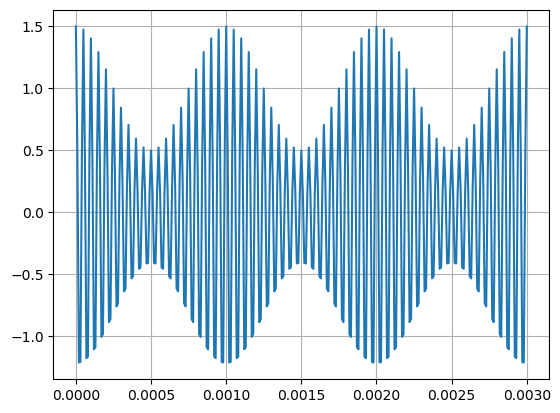

In [24]:
ϕ_lc = A .* xc + xm_lc .* xc

plot(t, ϕ_lc)
grid("on");

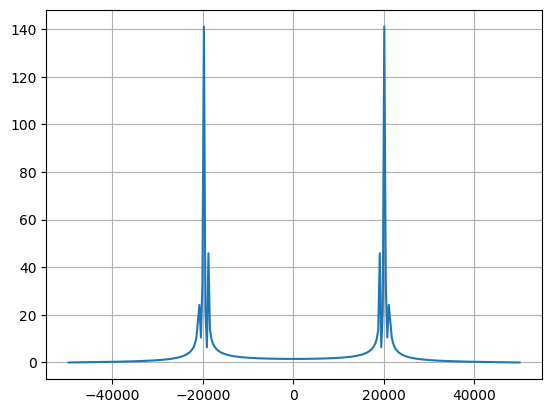

In [25]:
Φ_lc = fft(ϕ_lc)

plot(fx, fftshift(abs.(Φ_lc)))
grid("on");

## Julia Exercise 6.2b – DSB-LC AM demodulation

Write code to demodulate the DSB-LC AM signal. The suggested method is to full-wave rectify the AM signal, and then pass it through a LPF to a waveform similar (by scaled) to an envelope detector.

Choose a LPF cutoff frequency of 5kHz. This is the bandwidth of human voice. Also try a BPF with passband 20Hz to 5kHz, which is fine for human voice communications. This removes the DC component. (https://www.dpamicrophones.com/mic-university/facts-about-speech-intelligibility)

output_of_rectifier = abs.(ϕ);  
H = # Try a LPF or a BPF      
output_of_filter = real( ifft( fft(output_of_rectifier).*H ));

Let A=1 for these simulations. Initially, let k=0.5
(i) Plot the output of the rectifier.
(ii) Plot the output of the filter. 

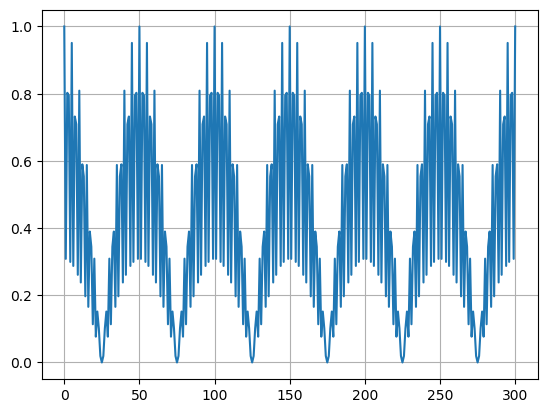

In [26]:
output_of_rectifier = abs.(ϕ);
#H = 
output_of_filter = real( ifft( fft(output_of_rectifier).*H ));

plot(output_of_rectifier);
grid("on");

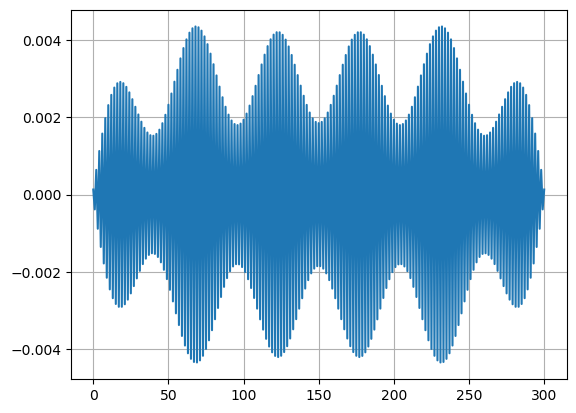

In [27]:
plot(output_of_filter);
grid("on");

## Julia Exercise 6.2c – DSB-LC AM modulation index

The modulation index specifies the degree of modulation. The following two slides (extracted from the lecture notes) illustrate degrees of modulation.

If the modulating waveform swings between -k and k ( where k>0), and the carrier amplitude is A, then the modulation index 
m = k/A.
Consider f(t) = k cos(2πfmt). By adjusting k, simulate three cases, and inspect the output of the demodulator:

(i) m = 0.5 (modulation is fine)       
(ii) m = 1 (critically modulated)     
(iv) m = 2 (over modulated)     

Plot f(t) and the output of the demodulator.
What can you conclude about the m>1 case?

## Julia Exercise 6.3 – Quadrature Multiplexing

Quadrature multiplexing is a method for transmitting two signals on the same carrier wave – read section 6.3.1 in the notes.
The method exploits the orthogonal property of sin and cos.

Simulate the modulator and demodulator system shown on the next slide for:     
x1(t) = cos.(2π*fm1*t) where fm1 = 200 Hz     
x2(t) = cos.(2π*fm2*t) where fm2 = 1000 Hz 

Carrier frequency fc = 10000 Hz. (Note: 10 kHz)   
Plot all labelled signals in the time domain, i.e.     
Inputs signals x1(t), x2(t),      
Signals ϕ1(t), ϕ2(t), prior to addition 
The quadrature multiplexed carrier wave ϕ(t),      
After multiplication y1(t), y2(t) before their LPFs      
Final outputs e1(t) and e2(t).        
Plot the frequency domain magnitude of  ϕ(t).    
Questions:   
(1) What is the minimum sample rate that you can use for this system? How did you determine it?   
(2) If x1(t) has bandwidth B1 and x2(t) has bandwidth B2, what is the bandwidth of the transmitted waveform ϕ(t)?   
(3) What happens if the sin and cos oscillators are not perfectly in quadrature? e.g. cos(ωt) and sin(ωt+θ) where θ models a
small unwanted phase shift. You can easily see the effect by modifying your simulation (use sin(ωt+θ) for both the
modulator and demodulator sides). Start with θ=0, then increase it in value, observing the effect on the outputs.    

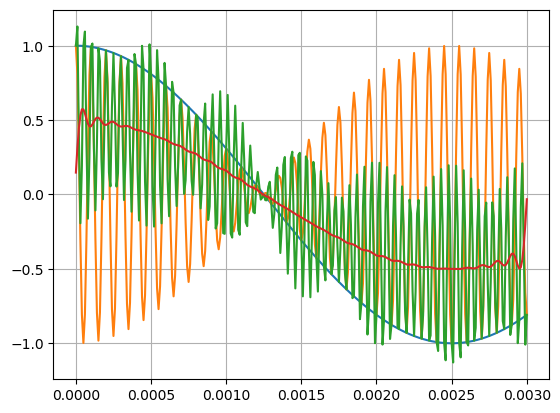

In [28]:
fm1 = 200 
fm2 = 1000 
fc2 = 10000

x1 = cos.(2π*fm1*t) 
x2 = cos.(2π*fm2*t)  

ϕ1 = x1 .* cos.(2π*fc2*t)
ϕ2 = x2 .* sin.(2π*fc2*t)

ϕm = ϕ1 .+ ϕ2

y1 = ϕm .* cos.(2π*fc2*t)
y2 = ϕm .* sin.(2π*fc2*t)

Y1 = fft(y1)
Y2 = fft(y2)

Hm = rect(fx ./20e3)

E1 = fftshift(Hm) .* Y1
E2 = fftshift(Hm) .* Y2

e1 = real.(ifft(E1))
e2 = real.(ifft(E2))

plot(t, x1)

plot(t, ϕ1)

plot(t, y1)
plot(t, e1);
grid("on");

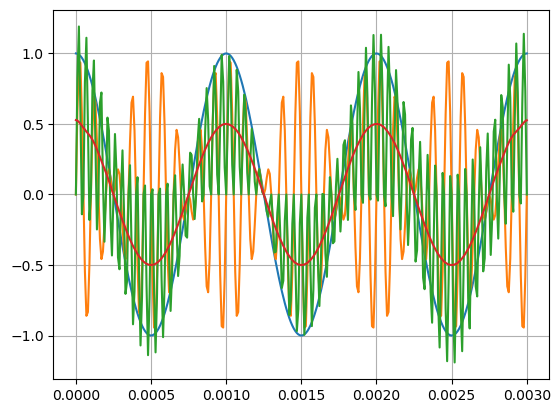

In [29]:
plot(t, x2)

plot(t, ϕ2)

plot(t, y2)
plot(t, e2);
grid("on");

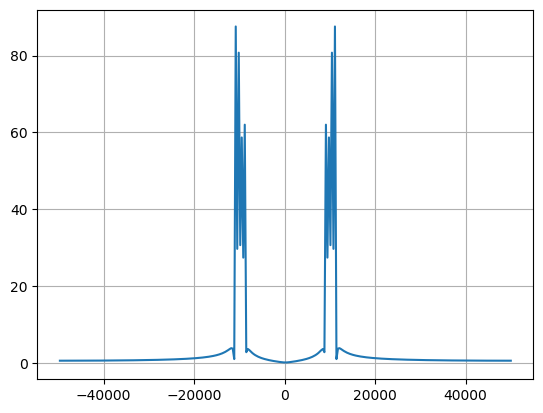

In [30]:
ΦM = fft(ϕm)
plot(fx, fftshift(abs.(ΦM)))
grid("on");